# I] Import and options


In [7]:
import pandas, numpy, seaborn
# import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# have text as text and not curve in .svg
matplotlib.rcParams['svg.fonttype'] = 'none'
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':30, 'font.family':'FreeSans', 'xtick.labelsize':26, 'ytick.labelsize':26, 'figure.figsize':(12, 8)})

In [8]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [9]:
%%time
#DL + open
path = input_file_directory + "mefs/mefs_proliferation/exp1_proliferation.csv"
prolif_df = pandas.read_csv(path, sep = ";")
#change comma to dot
prolif_df = prolif_df.astype(str)
prolif_df = prolif_df.apply(lambda x: x.str.replace(',','.'))
#convert to float
prolif_df = prolif_df.astype(float)
prolif_df = prolif_df.iloc[:31,:]
print(prolif_df.shape)
prolif_df.tail()

(31, 49)
Wall time: 27.9 ms


,Elapsed,Normal + DMEM + DMSO,EV + DMEM + DMSO,WT1 + DMEM + DMSO,dVSR(1) + DMEM + DMSO,WT2 + DMEM + DMSO,dVSR(2) + DMEM + DMSO,Normal + DMEM + BAF,EV + DMEM + BAF,WT1 + DMEM + BAF,...,WT1 + Starvation + DMSO (Std Err Img),dVSR(1) + Starvation + DMSO (Std Err Img),WT2 + Starvation + DMSO (Std Err Img),dVSR(2) + Starvation + DMSO (Std Err Img),Normal + Starvation + BAF (Std Err Img),EV + Starvation + BAF (Std Err Img),WT1 + Starvation + BAF (Std Err Img),dVSR(1) + Starvation + BAF (Std Err Img),WT2 + Starvation + BAF (Std Err Img),dVSR(2) + Starvation + BAF (Std Err Img)
26,52.0,86.82537,94.97466,98.28023,96.87165,91.70433,96.42653,69.76159,62.73172,77.88731,...,3.091698,3.308378,2.522672,3.027512,2.855083,2.157001,3.642731,2.490677,2.294660,1.953691
27,54.0,91.09386,92.59055,95.63158,92.18909,83.09866,96.64404,74.52564,71.13065,83.69419,...,4.319202,2.749834,3.140880,3.444478,2.760447,2.854899,3.951364,3.387626,2.997449,2.887991
28,56.0,94.62511,94.85287,98.22715,97.70577,92.93327,98.32720,80.08359,83.17780,92.49662,...,6.036583,2.253902,3.614776,3.440794,2.758153,3.101831,4.040591,4.357156,3.960287,3.412214
29,58.0,96.35883,96.68823,98.52901,97.82701,94.64336,97.99445,78.96611,84.68988,91.86390,...,6.222861,2.711493,2.296404,2.998320,2.866705,1.957413,4.385201,4.414485,3.758769,3.228660
30,60.0,95.47753,97.60972,98.94588,97.17578,92.79214,97.79563,69.09030,70.62864,84.43202,...,3.224854,2.597328,1.912236,2.211504,2.475111,2.604975,4.567994,3.488782,2.819020,2.183641


In [10]:
#I have 6 cell lines per condition and 4 conditions
#List of Columns
##select RICH DMEM with only dmso
prolif_rich_DMSO = prolif_df.iloc[:,1:7].columns
##select RICH DMEM with only baf
prolif_rich_BAF = prolif_df.iloc[:,7:13].columns
##df with STARV with only dmso
prolif_starv_DMSO = prolif_df.iloc[:,13:19].columns
##df with STARV with only baf
prolif_starv_BAF = prolif_df.iloc[:,19:25].columns

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


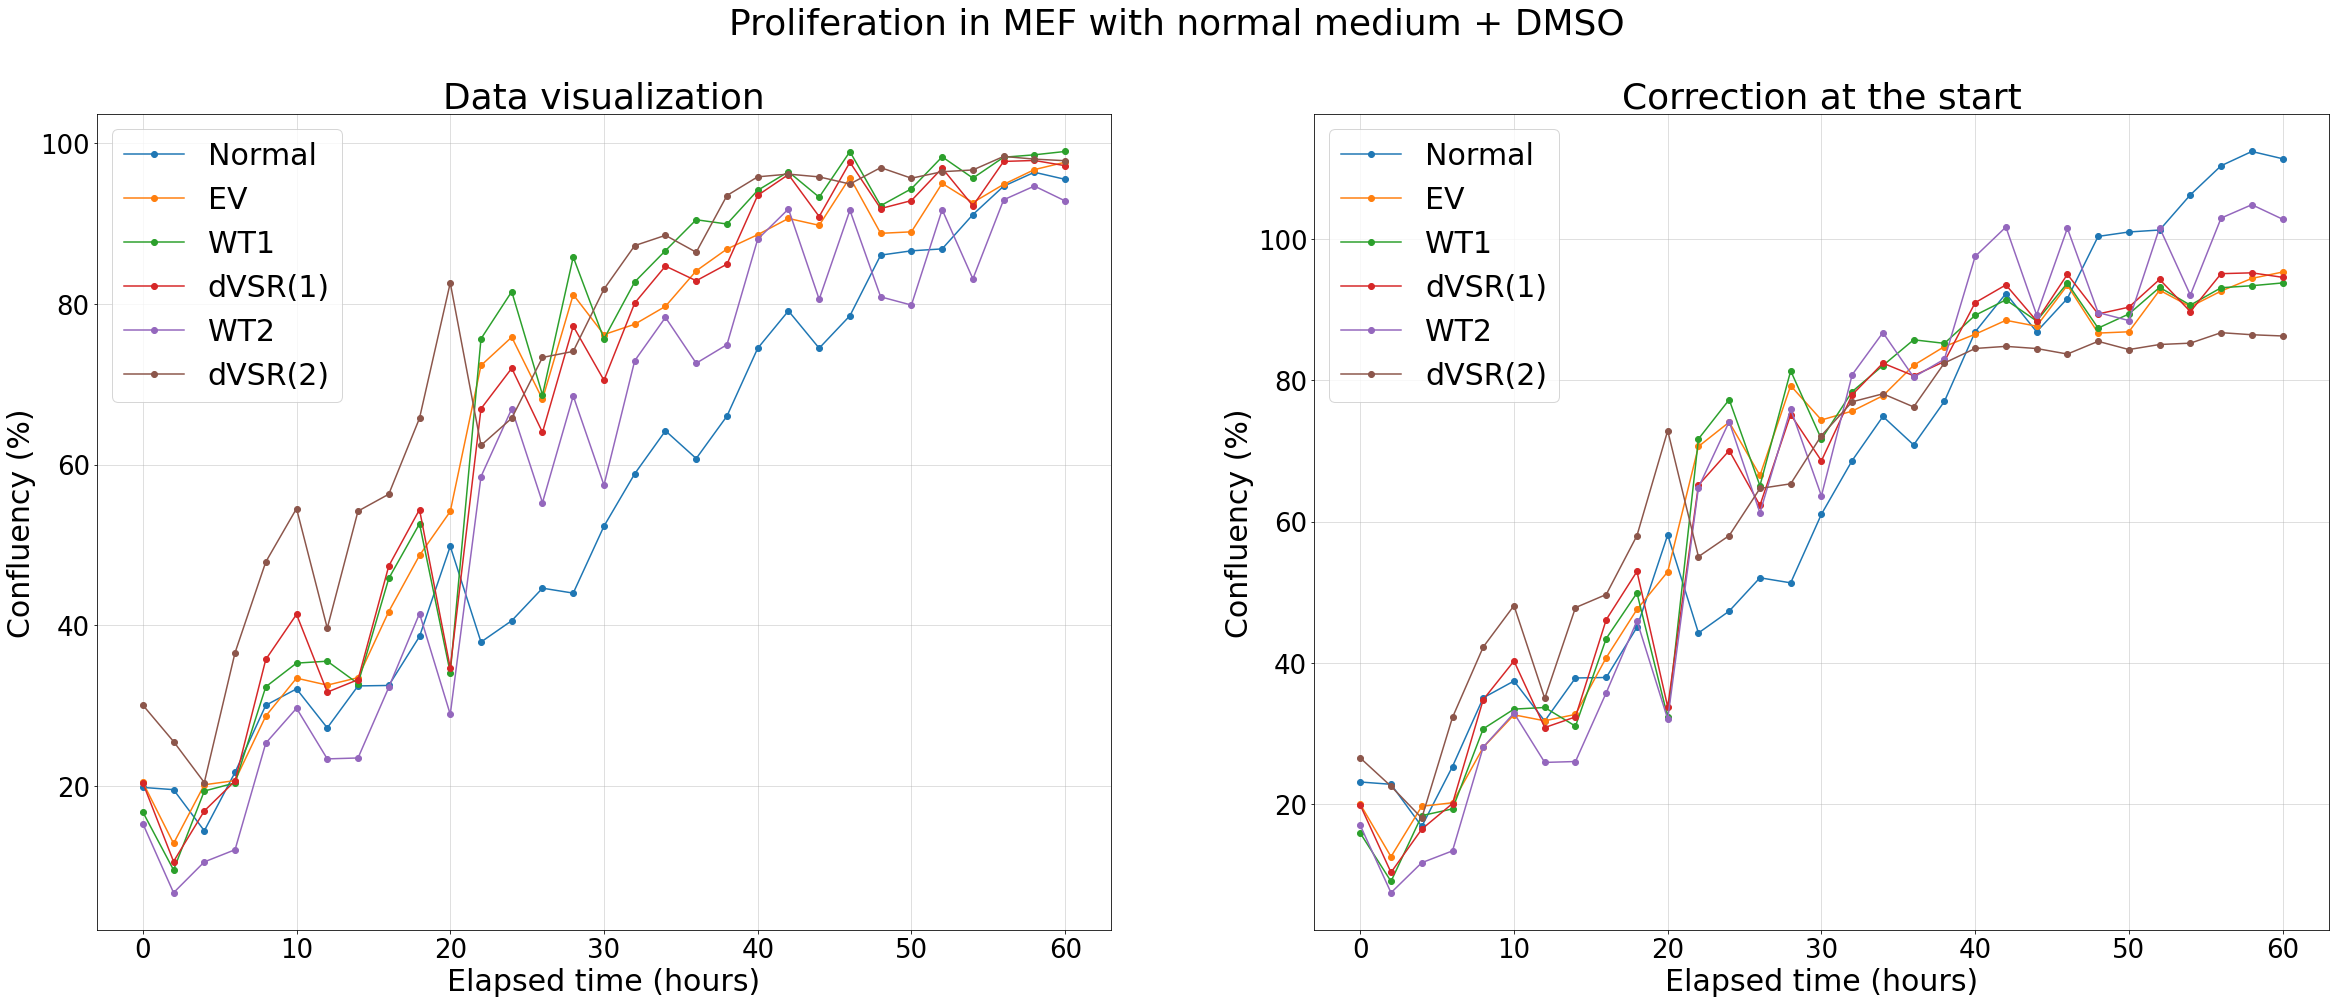

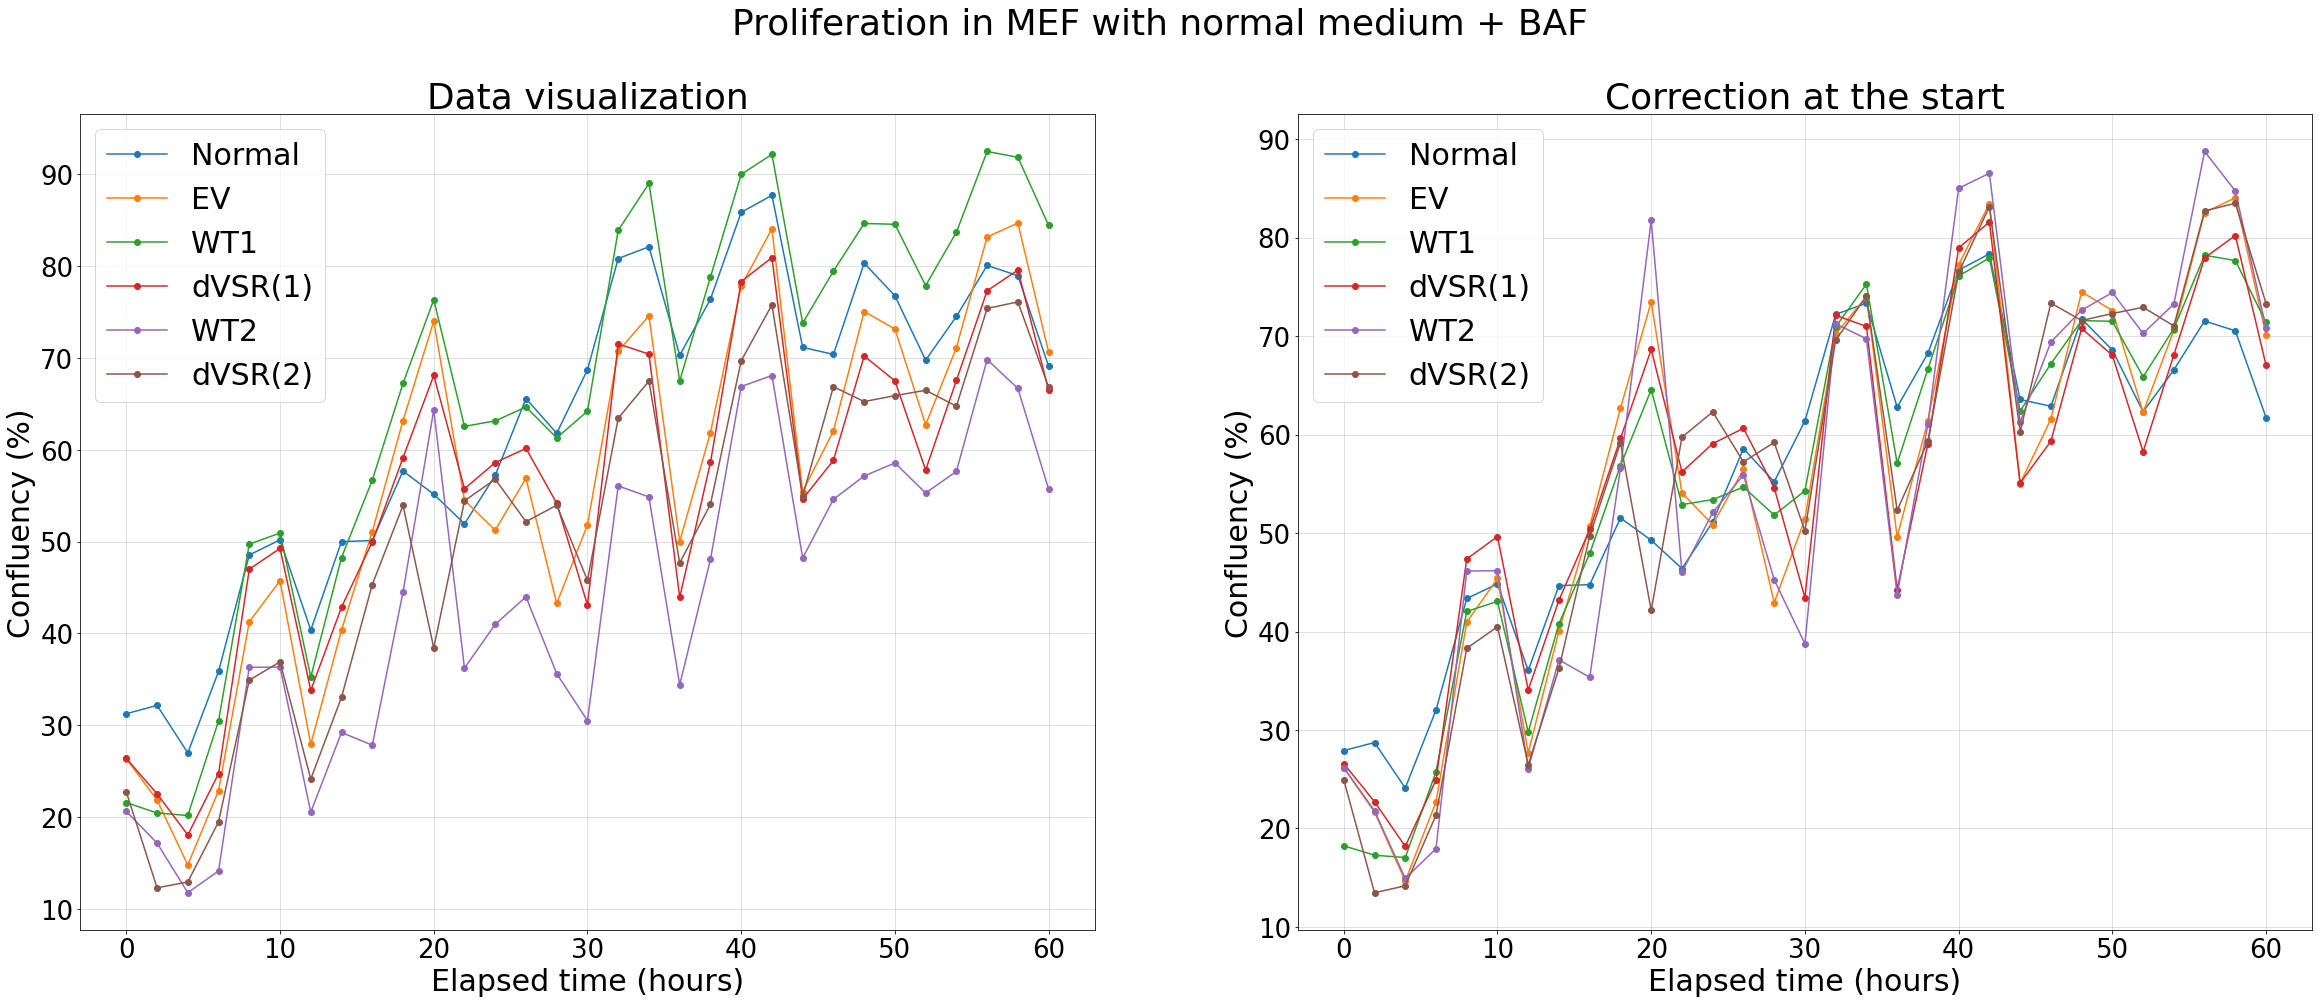

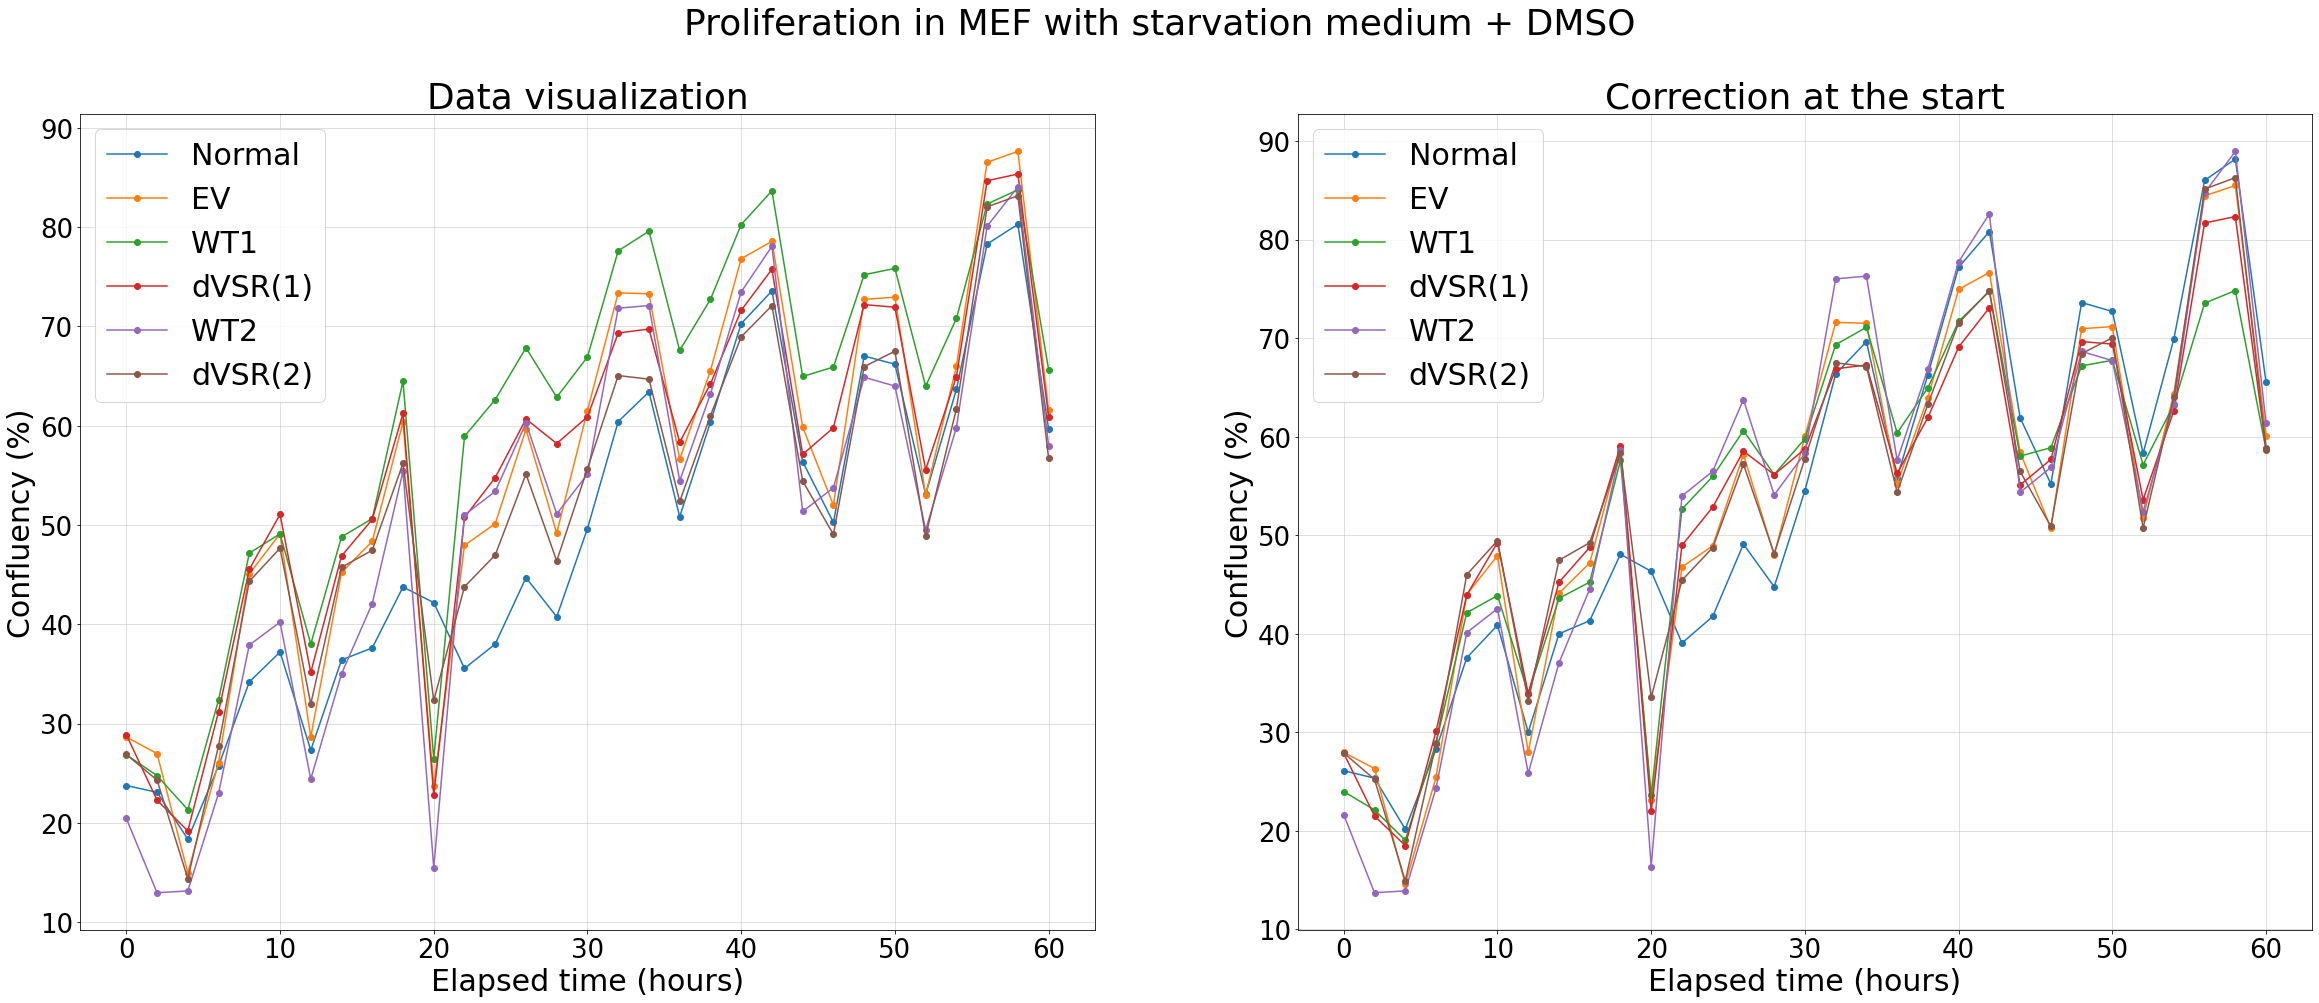

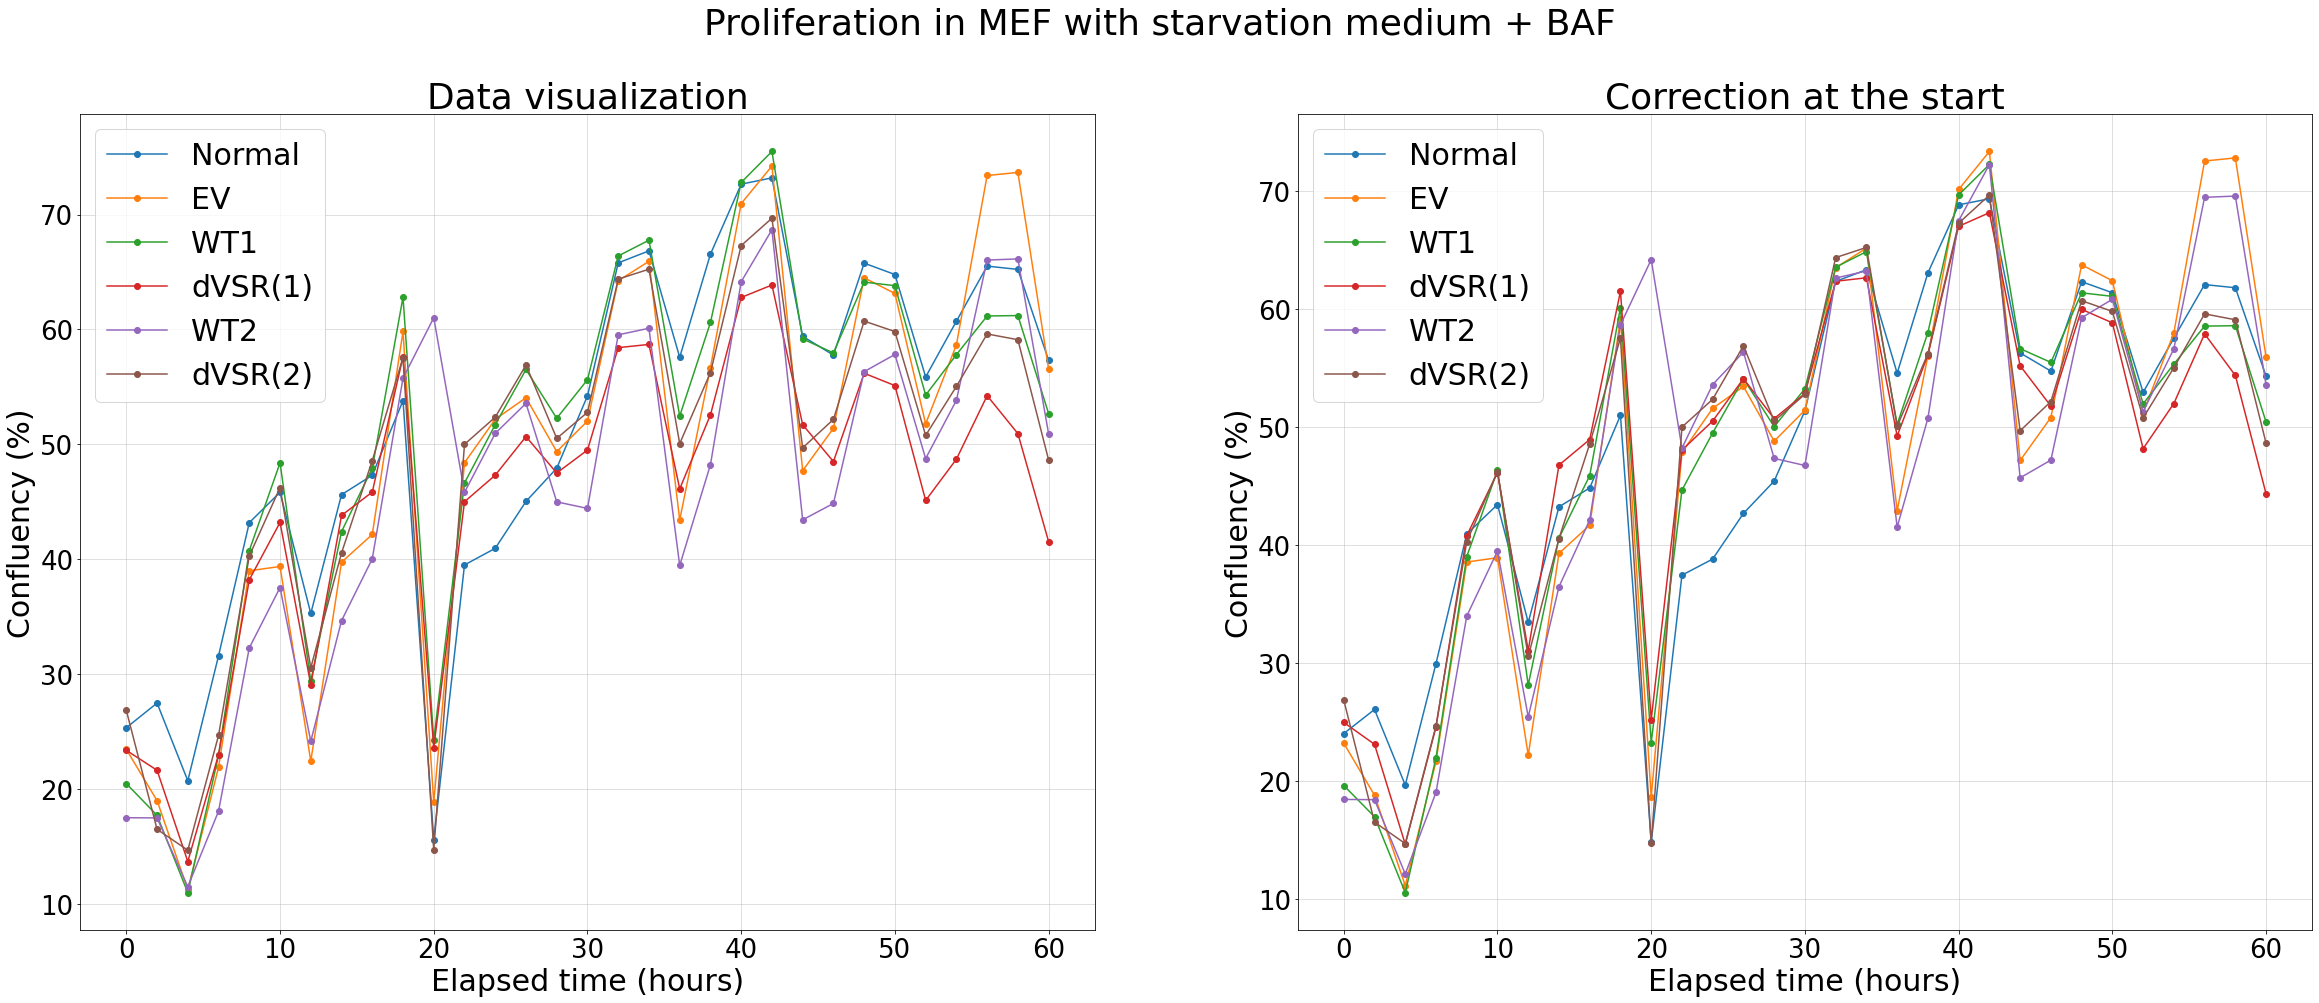

In [11]:
#Visualization of all data
all_data = [[prolif_rich_DMSO, ' with normal medium + DMSO'],
            [prolif_rich_BAF, ' with normal medium + BAF'],
            [prolif_starv_DMSO, ' with starvation medium + DMSO'],
            [prolif_starv_BAF, ' with starvation medium + BAF']]
        
for data in all_data:
    condition_label = data[1]
    col_selection = data[0]
    
    fig, ax = plt.subplots(1,2, figsize=(40,15))
    fig.suptitle('Proliferation in MEF'+ condition_label)
    
    for column in col_selection:     
        label_ = column.split(' ')[0]
        
        #graph 1, data visualization
        ax[0].plot(prolif_df['Elapsed'], prolif_df[column], 'o-', label= label_)
        ax[0].grid(alpha = 0.5)
        ax[0].legend()
        ax[0].set_title("Data visualization")
        ax[0].set_ylabel('Confluency (%)')
        ax[0].set_xlabel('Elapsed time (hours)')
        
        ##Correction
        shift = prolif_df[col_selection].mean()   #list of means for all columns
        general_mean = prolif_df[col_selection].mean().mean() #mean of means
        relative_mu = shift/general_mean #correction to apply for each column
        corrected_data = prolif_df[col_selection]/relative_mu #corrected data
        
        #graph 2, Correction at the start
        ax[1].plot(prolif_df['Elapsed'], corrected_data[column], 'o-', label= label_)
        ax[1].grid(alpha = 0.5)
        ax[1].legend()
        ax[1].set_title("Correction at the start")
        ax[1].set_ylabel('Confluency (%)')
        ax[1].set_xlabel('Elapsed time (hours)')
    print()

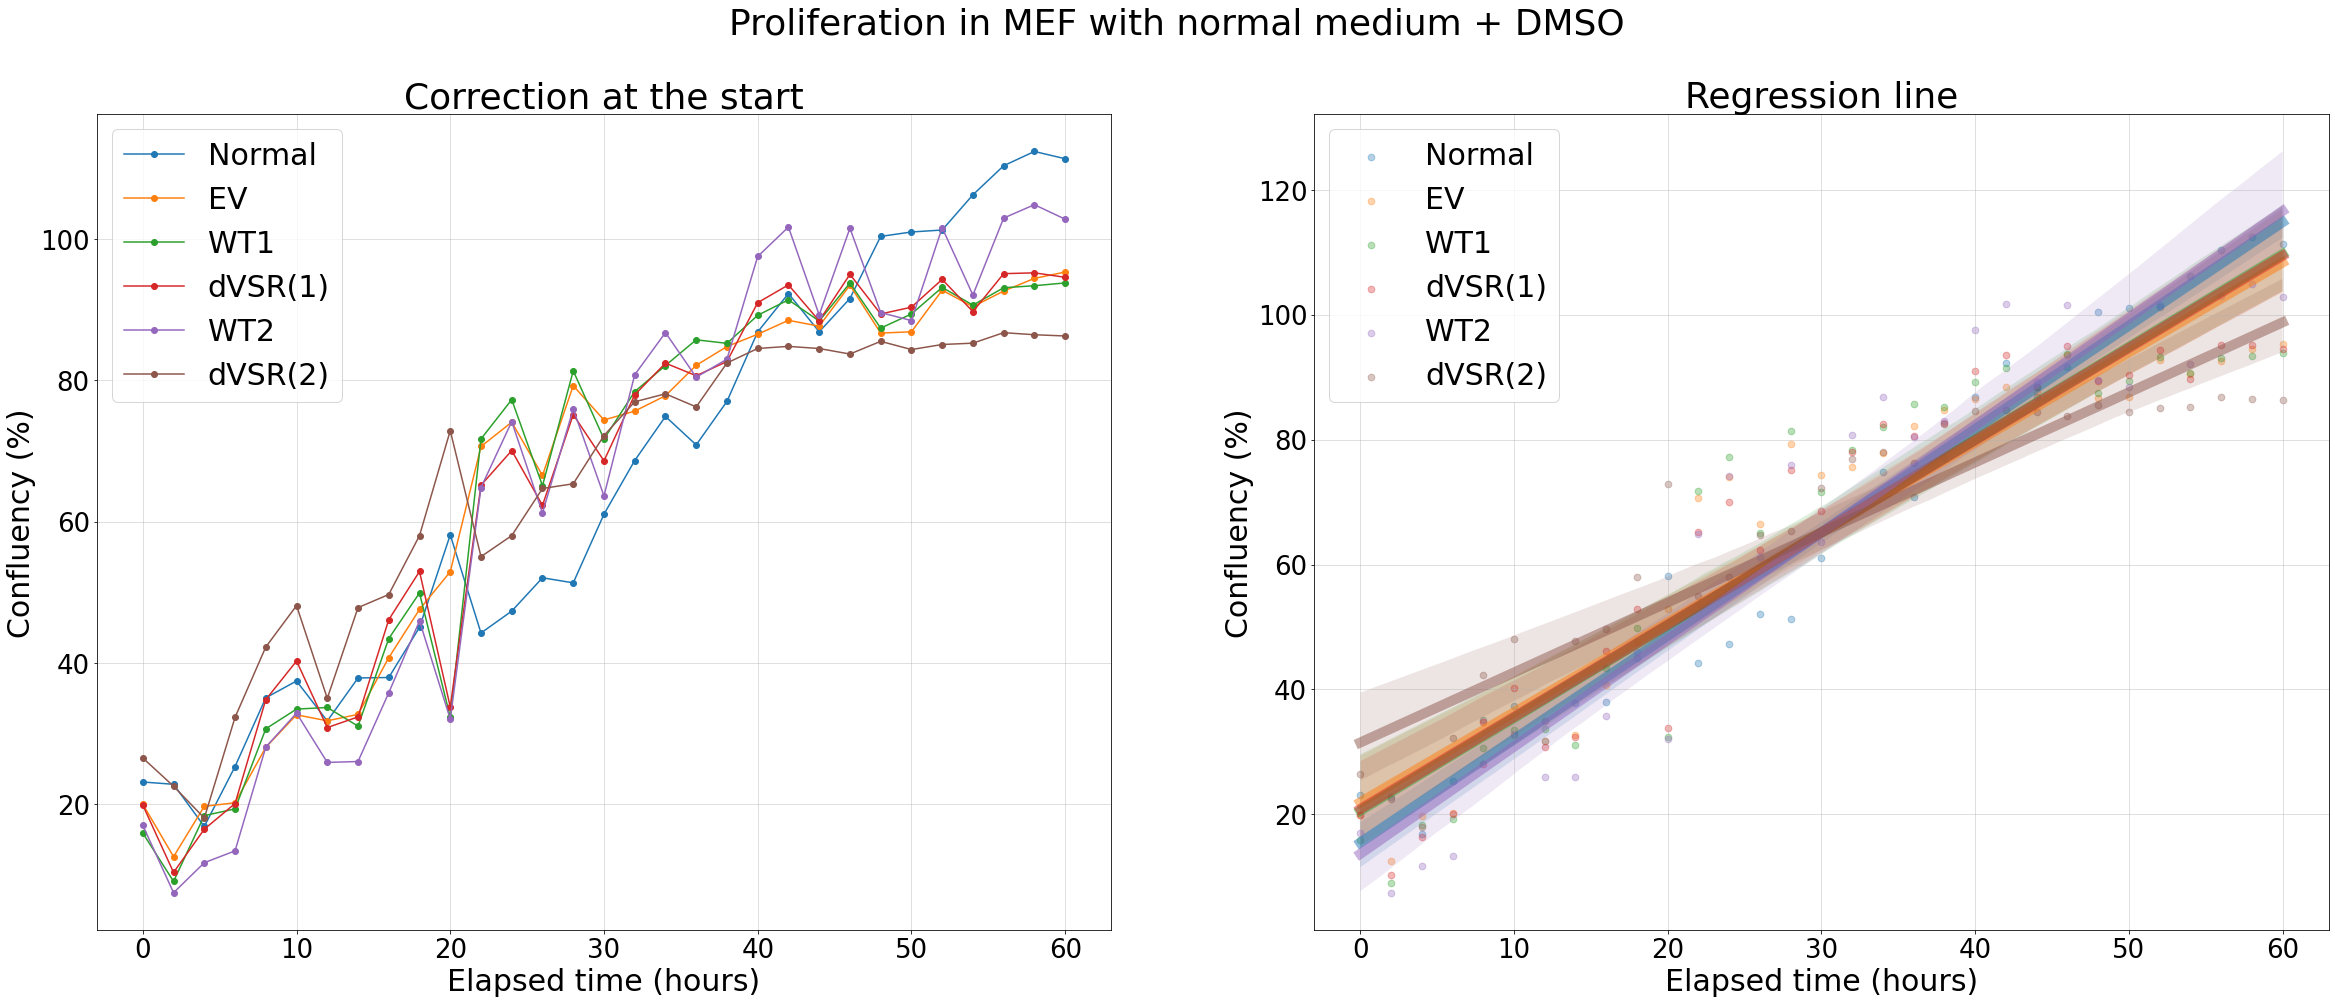

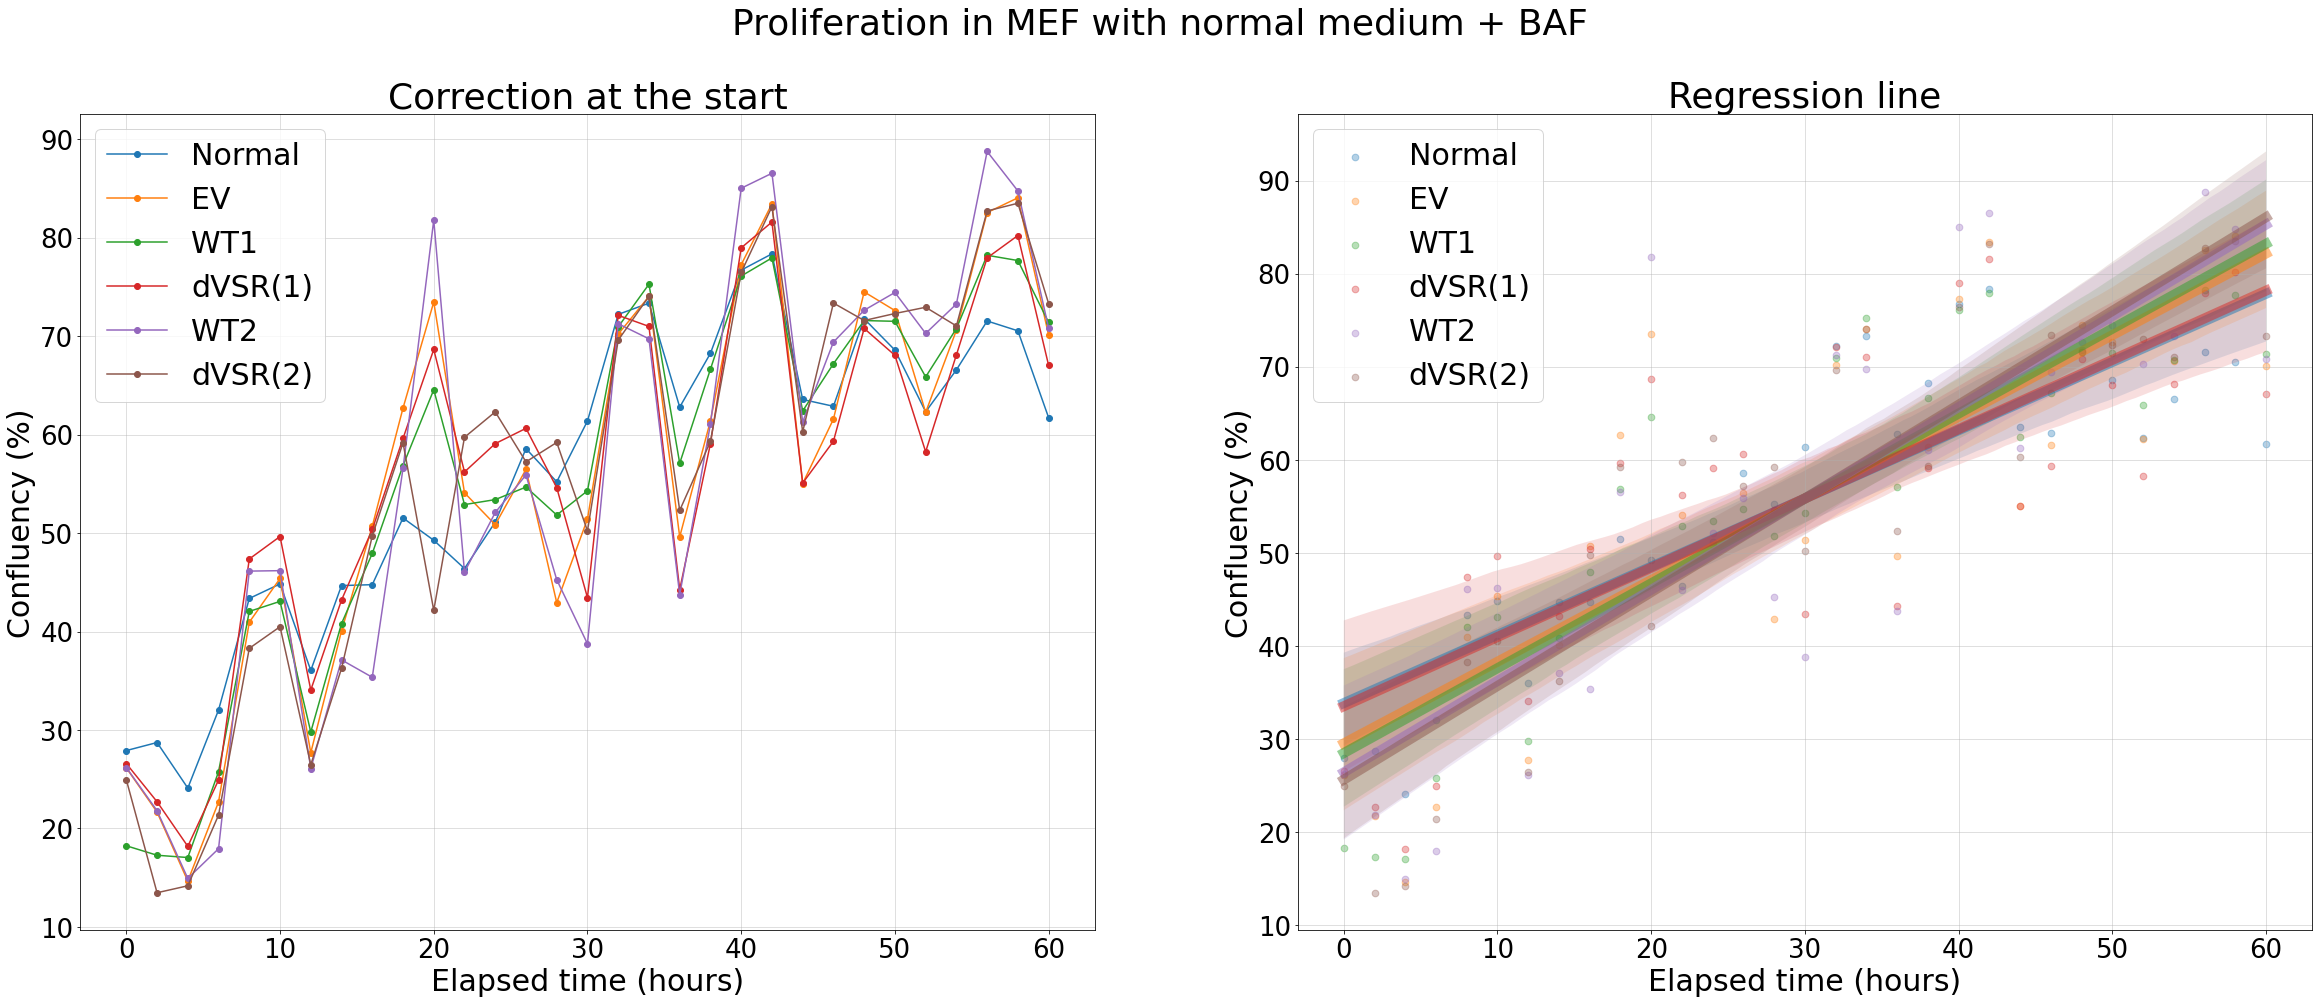

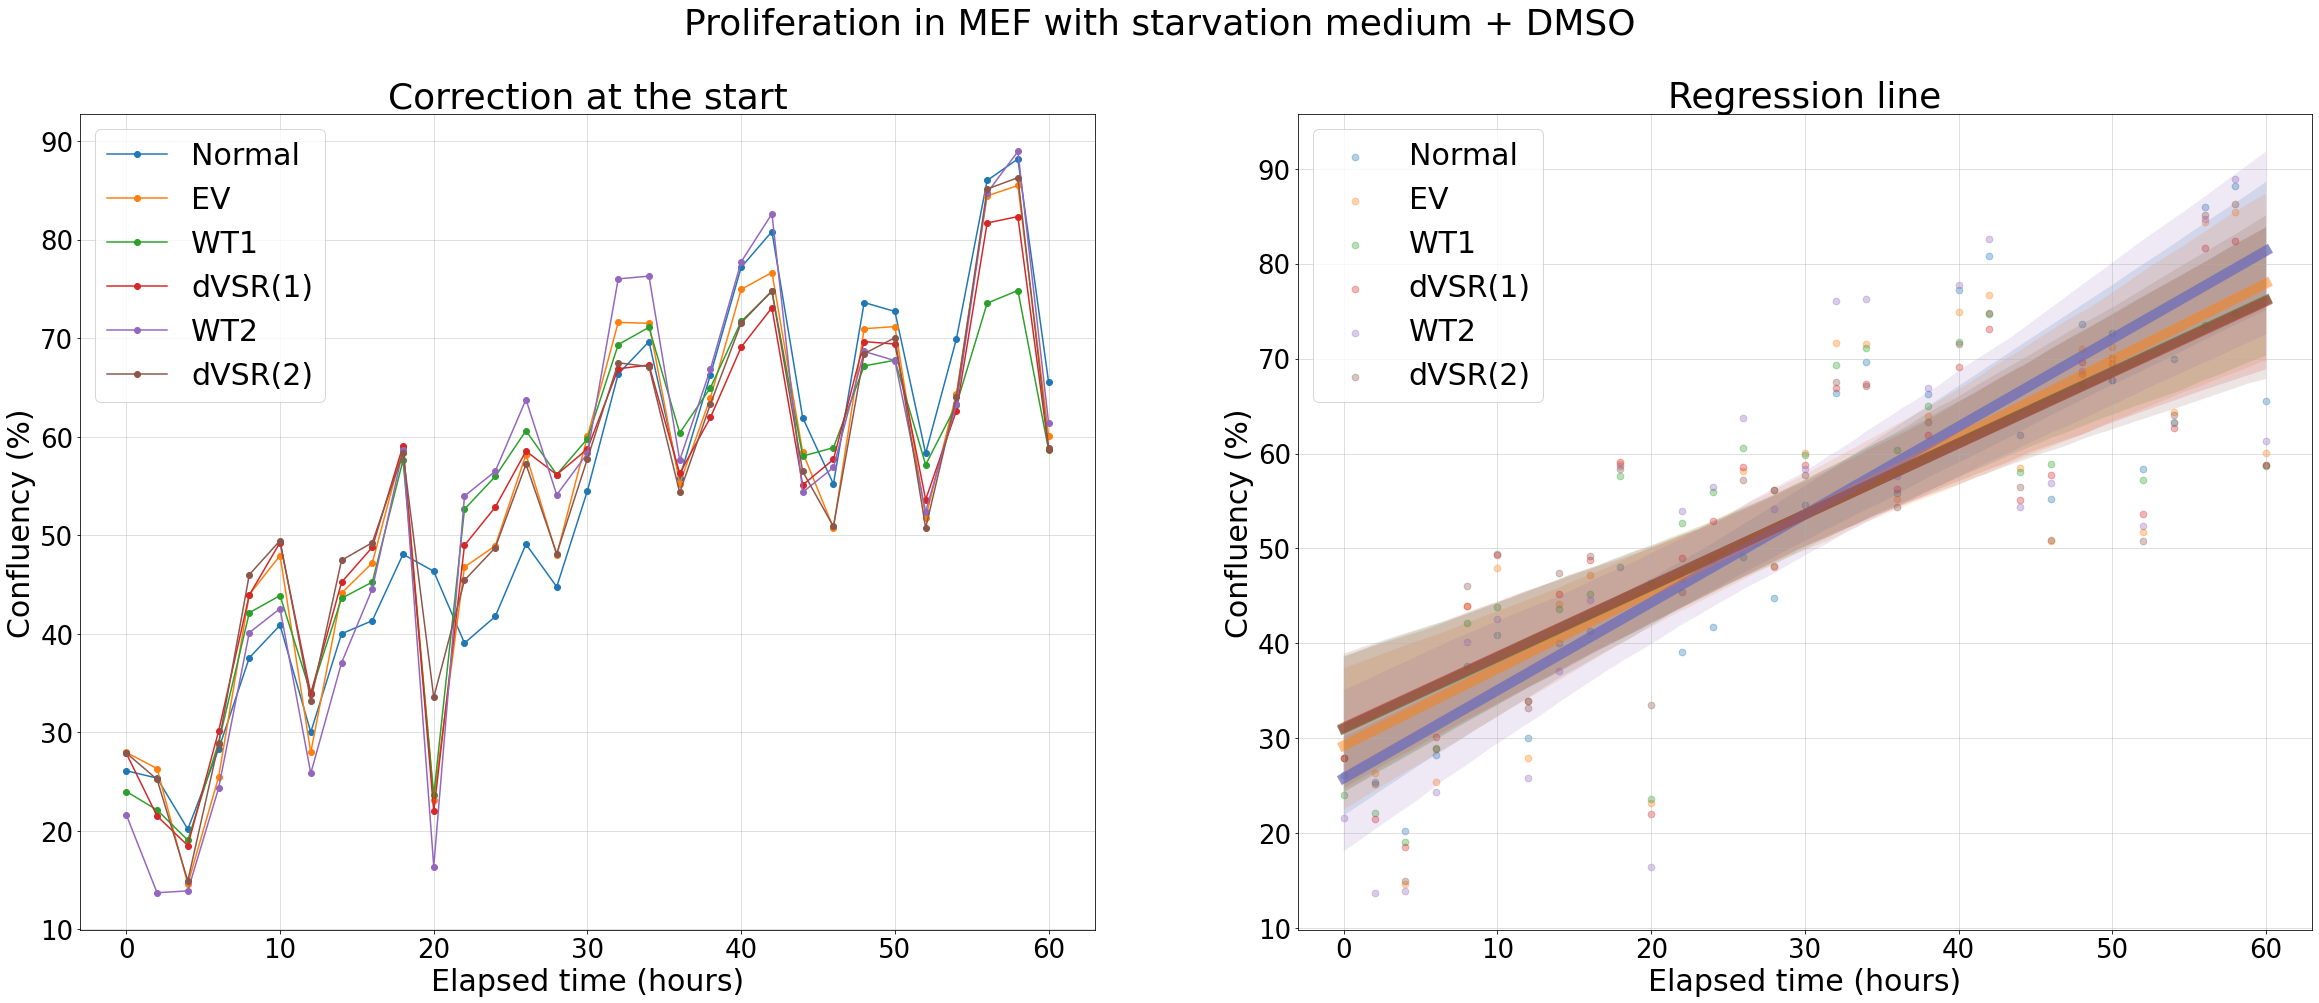

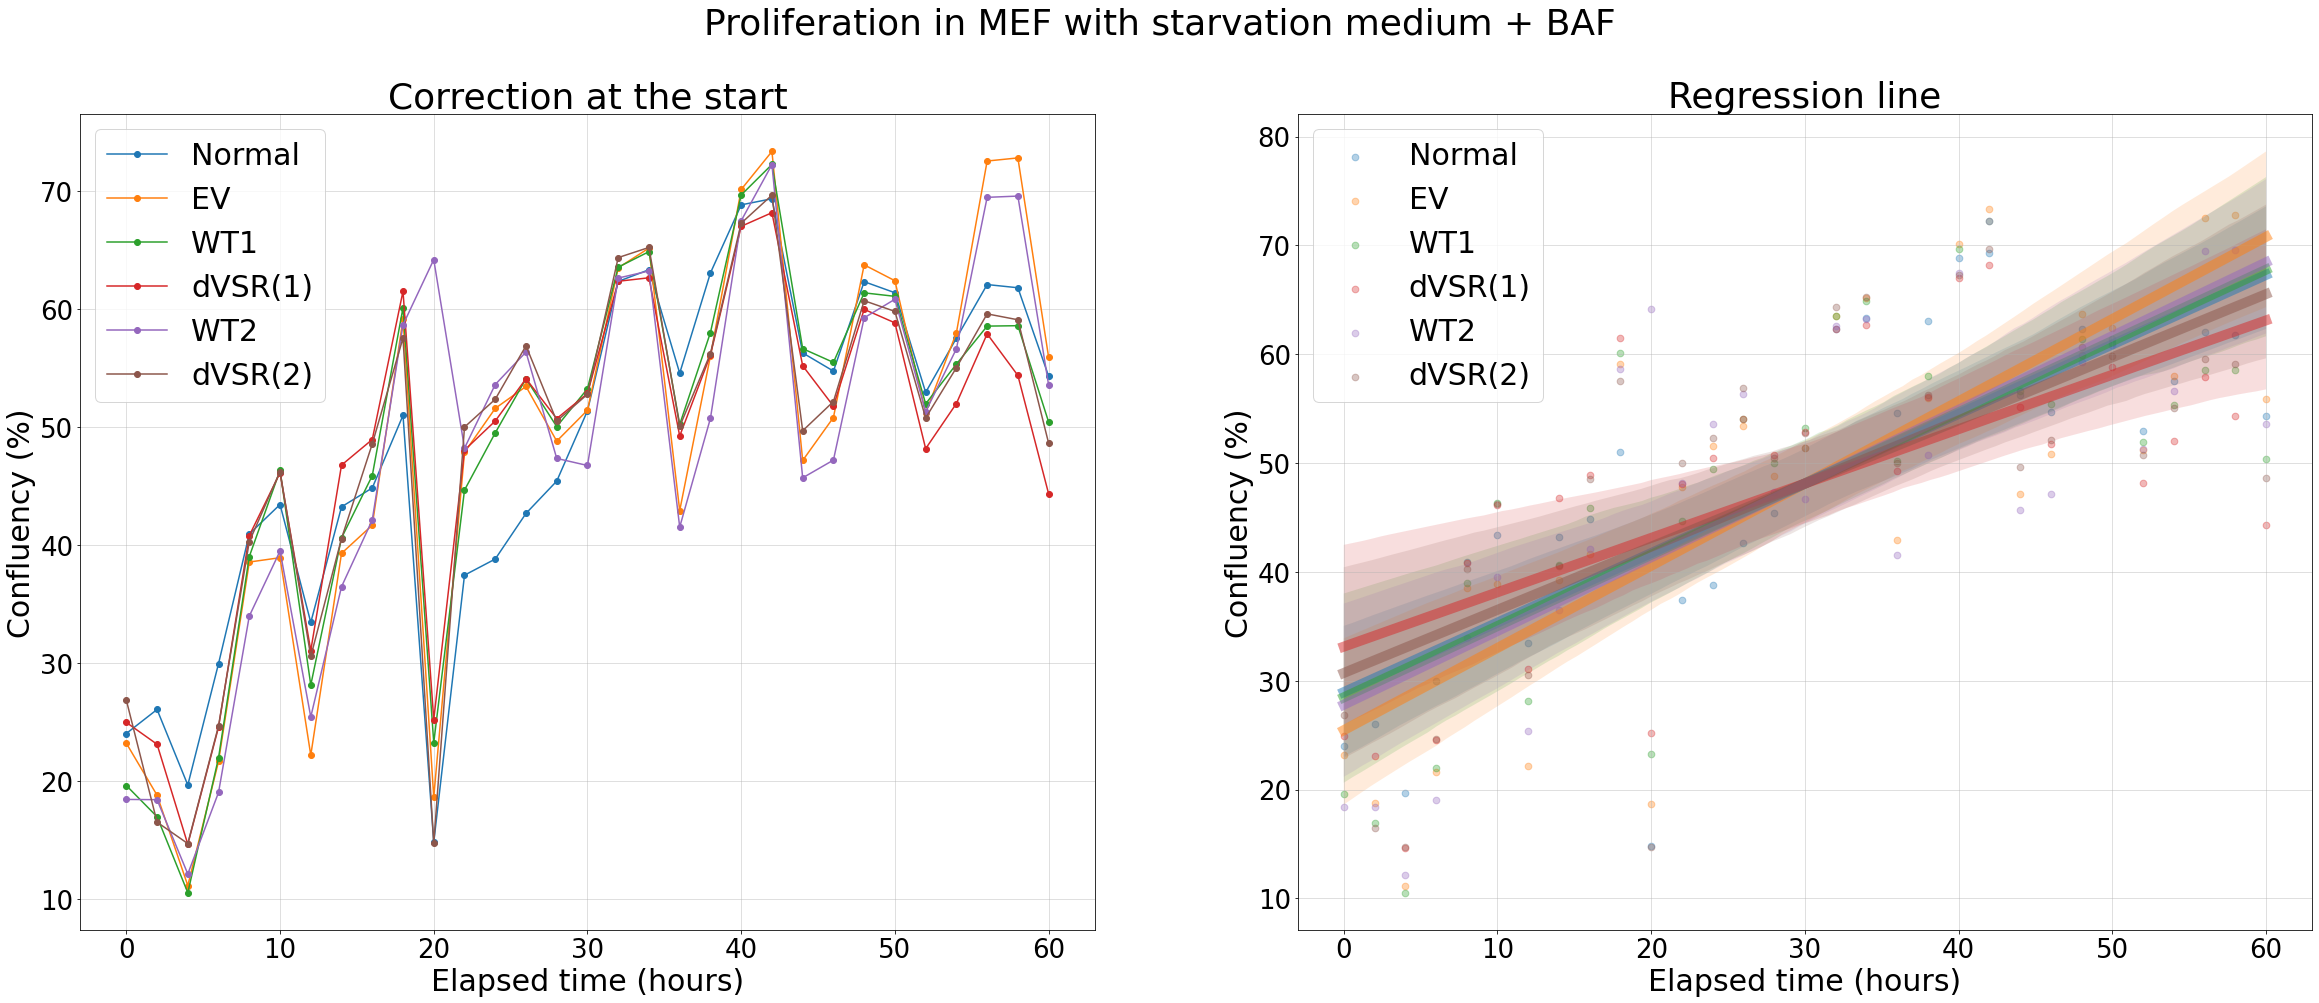

In [12]:
#Visualization of all data
all_data = [[prolif_rich_DMSO, ' with normal medium + DMSO'],
            [prolif_rich_BAF, ' with normal medium + BAF'],
            [prolif_starv_DMSO, ' with starvation medium + DMSO'],
            [prolif_starv_BAF, ' with starvation medium + BAF']]
        
for data in all_data:
    condition_label = data[1]
    col_selection = data[0]
    
    fig, ax = plt.subplots(1,2, figsize=(40,15))
    fig.suptitle('Proliferation in MEF'+ condition_label)
    
    for column in col_selection:     
        label_ = column.split(' ')[0]
        
#         #graph 1, data visualization
#         x=prolif_df['Elapsed']
#         y=prolif_df[column]
#         ax[0].plot(x, y, 'o-', label= label_)
#         ax[0].grid(alpha = 0.5)
#         ax[0].legend()
#         ax[0].set_title("Data visualization")
#         ax[0].set_ylabel('Confluency (%)')
#         ax[0].set_xlabel('Elapsed time (hours)')
        
        ##Correction
        shift = prolif_df[col_selection].mean()   #list of means for all columns
        general_mean = prolif_df[col_selection].mean().mean() #mean of means
        relative_mu = shift/general_mean #correction to apply for each column
        corrected_data = prolif_df[col_selection]/relative_mu #corrected data
        
        #graph 2, Correction at the start
        x=prolif_df['Elapsed']
        y=corrected_data[column]
        ax[0].plot(x, y, 'o-', label= label_)
        ax[0].grid(alpha = 0.5)
        ax[0].legend()
        ax[0].set_title("Correction at the start")
        ax[0].set_ylabel('Confluency (%)')
        ax[0].set_xlabel('Elapsed time (hours)')
        
        #graph 3, Regression lines
        x=prolif_df['Elapsed']
        y=corrected_data[column]
        seaborn.regplot(x=x, y=y,scatter=True, line_kws={'linewidth':10, 'alpha':0.5},
                        scatter_kws={'s':45, 'alpha':1/3}, label= label_)
        ax[1].grid(alpha = 0.5)
        ax[1].legend()
        ax[1].set_title("Regression line")
        ax[1].set_ylabel('Confluency (%)')
        ax[1].set_xlabel('Elapsed time (hours)')
    print()